_Author: Guoqing Wang (guoqing.wang@nasa.gov), OB.DAAC Scientist, NASA GSFC; SSAI_

**<ins>Read and plot NASA ocean color level-3 data - 8-day chlorophyll a, monthly Rrs(412)</ins>**

This tutorial shows an example of reading and plotting a level-3 dataset.


In [1]:
# !pip install netCDF4
# !pip install cmocean

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from matplotlib import pyplot as plt
# from mpl_toolkits.basemap import Basemap
import pandas as pd
import netCDF4 as nc
import numpy as np
import xarray as xr                   # pip install xarray
import urllib.request

import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

**1. Download file**<br>
In this example, the image to be used is MODIS AQUA L3 8day averaged 4km chlorophyll image for Sep 13-20, 2016 </br>
- Specify your **appkey**
<br>Generate an [appkey](https://oceandata.sci.gsfc.nasa.gov/appkey/) for your Earthdata login credentials and update the following variable "key" correspondingly.

In [6]:
key = 'abcd1234' # paste your appkey here
filename = ['AQUA_MODIS.20160913_20160920.L3m.8D.CHL.chlor_a.4km.nc',
            'AQUA_MODIS.20201001_20201031.L3m.MO.RRS.Rrs_412.4km.nc'] 
# L3 chlorophyll 8-day 4km file
# L3 Rrs(412) monthly mean 4km file

for file in filename:

    urls = r'https://oceandata.sci.gsfc.nasa.gov/ob/getfile/%s?appkey=%s'%(file, key)

    urllib.request.urlretrieve(urls, file) # download the file to the current path

**2. Read and plot Level-3 8-day chlorophyll a**

In [7]:
# Open the datasets with xarray
filename = 'AQUA_MODIS.20160913_20160920.L3m.8D.CHL.chlor_a.4km.nc'
f = nc.Dataset(filename, 'r')
# Load attributes
ds = xr.open_dataset(filename)

In [8]:
# Use .data_vars to find variable names
# ds.data_vars

# read chlor_a, latitude, and longitude data 
lat = ds.chlor_a.lat
lon = ds.chlor_a.lon
chlor_a = ds.chlor_a.values
chlor = np.log10(chlor_a)

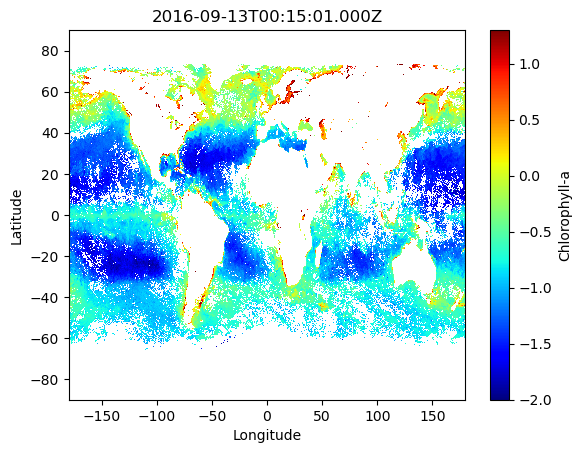

In [9]:
# Plot the chlorophyll-a data

plt.pcolormesh(lon,lat,np.squeeze(chlor),cmap = 'jet', vmin=-2, vmax=1.3)
plt.title(ds.time_coverage_start)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Chlorophyll-a',)

plt.show()

**3. Read and plot monthly Rrs(412)**

In [10]:
# Open the datasets with xarray
filename = 'AQUA_MODIS.20201001_20201031.L3m.MO.RRS.Rrs_412.4km.nc'
f = nc.Dataset(filename, 'r')
# Load attributes
ds = xr.open_dataset(filename)

In [11]:
# # Use .data_vars to find variable names
# ds.data_vars

# read Rrs, latitude, and longitude data 
lat = ds.Rrs_412.lat
lon = ds.Rrs_412.lon
Rrs_412 = ds.Rrs_412.values
logRrs = np.log10(Rrs_412)

Plot Rrs(412) with matplotlib and cartopy

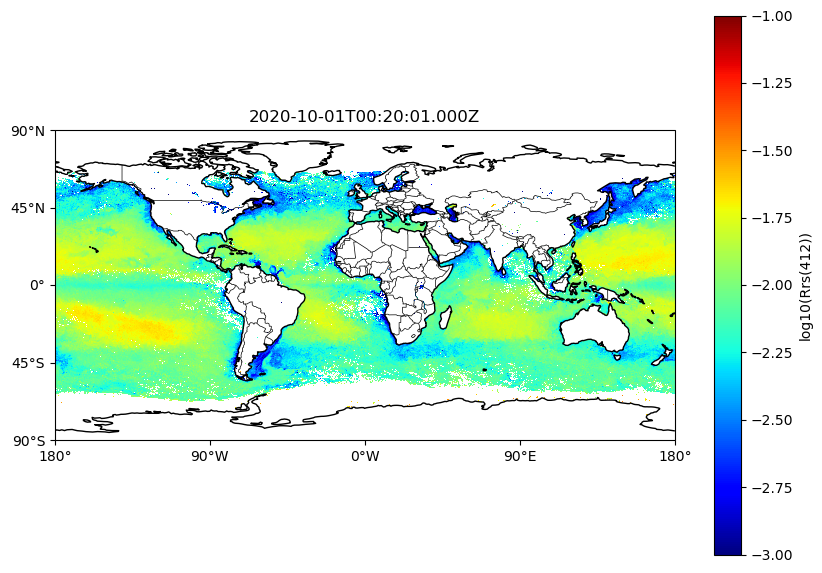

In [12]:
# Plot Rrs(412) data
fig = plt.figure(figsize=(10, 7))
map_projection = cartopy.crs.PlateCarree()
ax = plt.axes(projection=map_projection)

im = ax.pcolormesh(lon, lat,np.squeeze(logRrs),cmap = 'jet', vmin=-3, vmax=-1)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linewidth=0.5)

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5), crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.colorbar(im, label='log10(Rrs(412))')
plt.title(ds.time_coverage_start)

plt.show()